<a href="https://colab.research.google.com/github/ayushsood0909/ATM/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets  import load_iris
import pandas as pd
iris=load_iris
df=pd.DataFrame(data=iris.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])*/
df['species']=iris.target
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
Y=df[["species"]]
print(X)
print(Y)

AttributeError: ignored

In [10]:
import pandas as pd
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.info()
X=df[["5.1","3.5","1.4","0.2"]]
Y=df[["Iris-setosa"]]
print(X)
print(Y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
     5.1  3.5  1.4  0.2
0    4.9  3.0  1.4  0.2
1    4.7  3.2  1.3  0.2
2    4.6  3.1  1.5  0.2
3    5.0  3.6  1.4  0.2
4    5.4  3.9  1.7  0.4
..   ...  ...  ...  ...
144  6.7  3.0  5.2  2.3
145  6.3  2.5  5.0  1.9
146  6.5  3.0  5.2  2.0
147  6.2  3.4  5.4  2.3
148  5.9  3.0  5.1  1.8

[149 rows x 4 columns]
        Iris-setosa
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
144  Iris-virginica
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginic

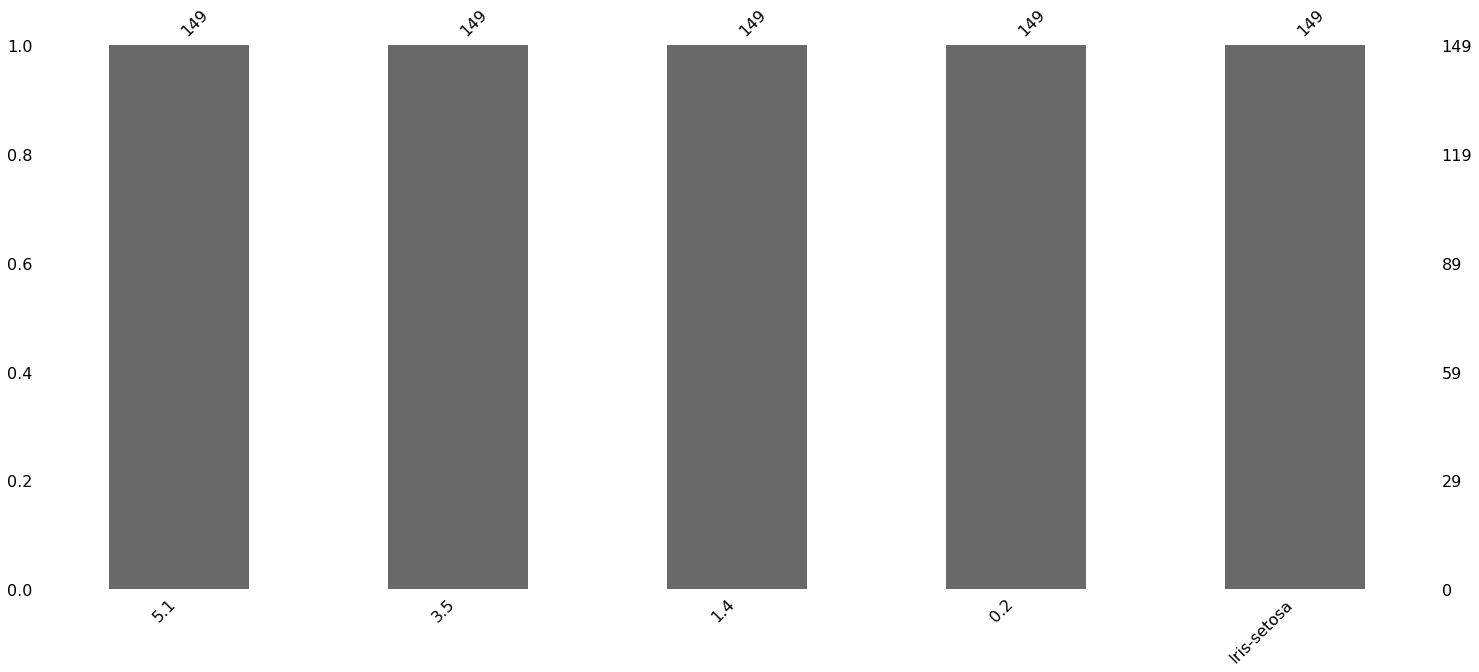

In [11]:
import missingno as ms
ms.bar(df)

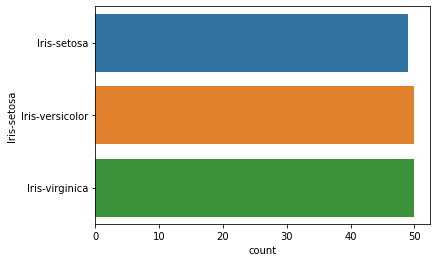

In [13]:
import seaborn as sns
sns.countplot(y="Iris-setosa",data=df)

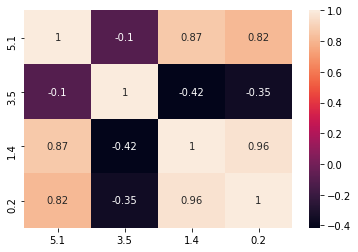

In [14]:
sns.heatmap(X.corr(),annot=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)


[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [17]:
import numpy as np
features=X_scaled.T
cov_matrix=np.cov(features)
print(cov_matrix)

[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [19]:
values,vectors=np.linalg.eig(cov_matrix)
print(values.shape)
print(vectors.shape)

(4,)
(4, 4)


In [20]:
print(vectors)

[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


In [21]:
print(values)

[2.92442837 0.93215233 0.14946373 0.02098259]


In [22]:
percentage_variance=[]
for i in range (len(values)):
  percentage_variance.append(values[i]/np.sum(values))
print(percentage_variance)

[0.7262003332692032, 0.2314740685864414, 0.03711515564584527, 0.005210442498510154]


In [23]:
projected_1=X_scaled.dot(vectors.T[0])
projected_2=X_scaled.dot(vectors.T[1])
res=pd.DataFrame(projected_1,columns=['PC1'])
res['PC2']=projected_2
res['species']=Y
print(res)

          PC1       PC2         species
0   -2.107950  0.644276     Iris-setosa
1   -2.387971  0.305833     Iris-setosa
2   -2.324879  0.562923     Iris-setosa
3   -2.405086 -0.687591     Iris-setosa
4   -2.083204 -1.530252     Iris-setosa
..        ...       ...             ...
144  1.859771 -0.379344  Iris-virginica
145  1.542004  0.908086  Iris-virginica
146  1.509255 -0.264606  Iris-virginica
147  1.369096 -1.015839  Iris-virginica
148  0.946803  0.021821  Iris-virginica

[149 rows x 3 columns]


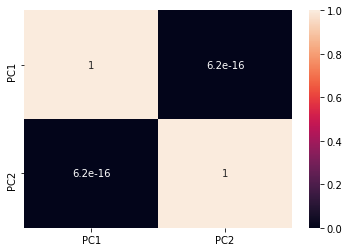

In [24]:
X=res[['PC1','PC2']]
sns.heatmap(X.corr(),annot=True)

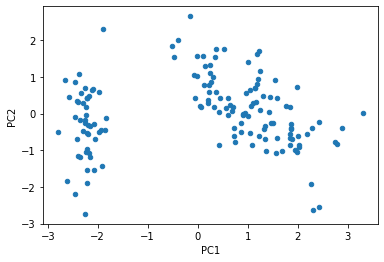

In [26]:
res.plot(kind="scatter",x="PC1",y="PC2")